In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [5]:
df =pd.read_csv('D:/Data1.csv')

In [6]:
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
...,...,...,...,...,...,...,...,...,...,...,...,...
61895,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61896,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61897,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61898,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [8]:
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
5,9/12/2020,9,12,2020,135,13,Afghanistan,AF,AFG,38041757.0,Asia,6.963401
6,8/12/2020,8,12,2020,200,6,Afghanistan,AF,AFG,38041757.0,Asia,7.094835
7,7/12/2020,7,12,2020,210,26,Afghanistan,AF,AFG,38041757.0,Asia,7.215755
8,6/12/2020,6,12,2020,234,10,Afghanistan,AF,AFG,38041757.0,Asia,7.326160
9,5/12/2020,5,12,2020,235,18,Afghanistan,AF,AFG,38041757.0,Asia,7.115865


In [12]:
df.isna().sum().sum()/len(df)

0.05492730210016155

In [13]:
df.dropna(inplace=True)

In [16]:
df_by_country=df.groupby('countriesAndTerritories')['cases', 'deaths'].sum().sort_values('cases',ascending=False)
df_by_country

<ipython-input-16-0c571f6231ae>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_by_country=df.groupby('countriesAndTerritories')['cases', 'deaths'].sum().sort_values('cases',ascending=False)


,cases,deaths
countriesAndTerritories,,
United_States_of_America,16256754,299177
India,9884100,143355
Brazil,6901952,181402
Russia,2653928,46941
France,2376852,57911
...,...,...
Montserrat,8,1
Falkland_Islands_(Malvinas),8,0
Anguilla,7,0


In [18]:
df.info

<bound method DataFrame.info of           dateRep  day  month  year  cases  deaths countriesAndTerritories  \
0      14/12/2020   14     12  2020    746       6             Afghanistan   
1      13/12/2020   13     12  2020    298       9             Afghanistan   
2      12/12/2020   12     12  2020    113      11             Afghanistan   
3      11/12/2020   11     12  2020     63      10             Afghanistan   
4      10/12/2020   10     12  2020    202      16             Afghanistan   
...           ...  ...    ...   ...    ...     ...                     ...   
61882    7/4/2020    7      4  2020      0       0                Zimbabwe   
61883    6/4/2020    6      4  2020      0       0                Zimbabwe   
61884    5/4/2020    5      4  2020      0       0                Zimbabwe   
61885    4/4/2020    4      4  2020      1       0                Zimbabwe   
61886    3/4/2020    3      4  2020      0       0                Zimbabwe   

      geoId countryterritoryCod

In [19]:
#Pays avec Taux de mortalité élevé

In [20]:
df_by_country['mortality_rate']=df_by_country['deaths']/df_by_country['cases']

Text(0.5, 1.0, 'Countries with highest mortality rates')

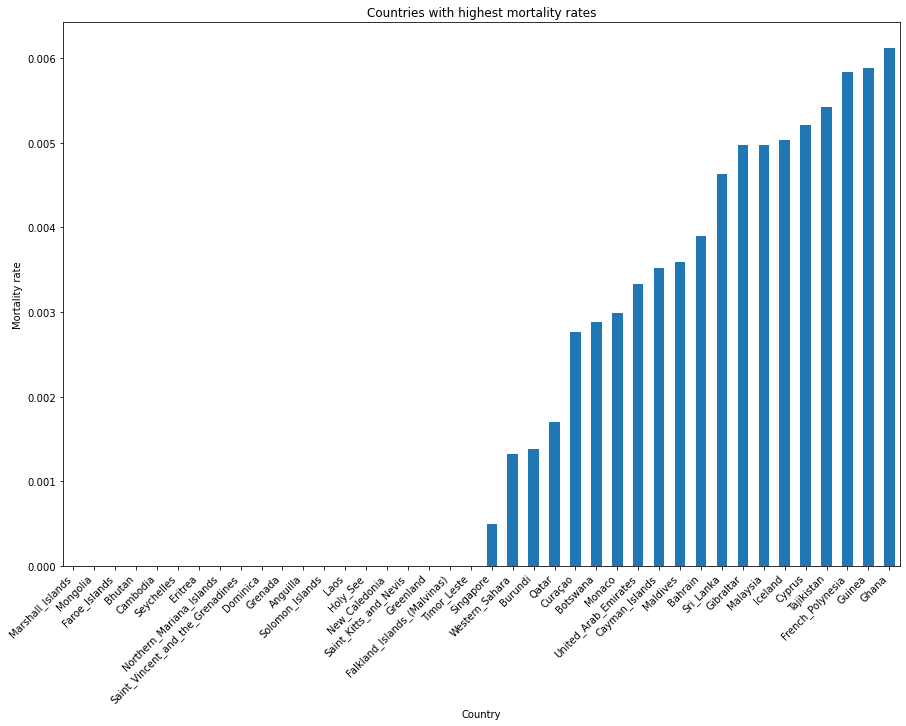

In [25]:
#Sorting the values for the mortality rate in the ascending order
plt.figure(figsize=(15,10))
ax = df_by_country['mortality_rate'].sort_values(ascending=True).head(40).plot.bar()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_xlabel("Country")
ax.set_ylabel("Mortality rate")
ax.set_title("Countries with highest mortality rates")

Text(0, 0.5, 'Number of deaths')

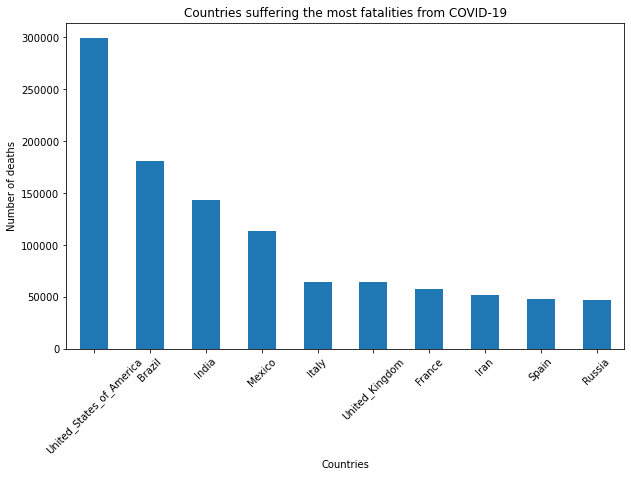

In [32]:


#sorting the number of deaths in the Descending order
plt.figure(figsize=(10,6))
ax=df_by_country['deaths'].sort_values(ascending=False).head(10).plot(kind='bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("Countries suffering the most fatalities from COVID-19")
ax.set_xlabel("Countries")
ax.set_ylabel("Number of deaths")



In [33]:
#Effet du confinement sur le nombre de cas

In [34]:
df_by_month = df.groupby('month')['cases','deaths'].sum()

<ipython-input-34-1d058dc13a81>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_by_month = df.groupby('month')['cases','deaths'].sum()


In [35]:
df_by_month.head(10)

,cases,deaths
month,,
1,9767,212
2,74717,2702
3,714475,35668
4,2338739,189142
5,2891247,140118
6,4249352,134069
7,7065668,166185
8,7958523,178556
9,8452473,162120


Text(0, 0.5, 'Nombre de morts')

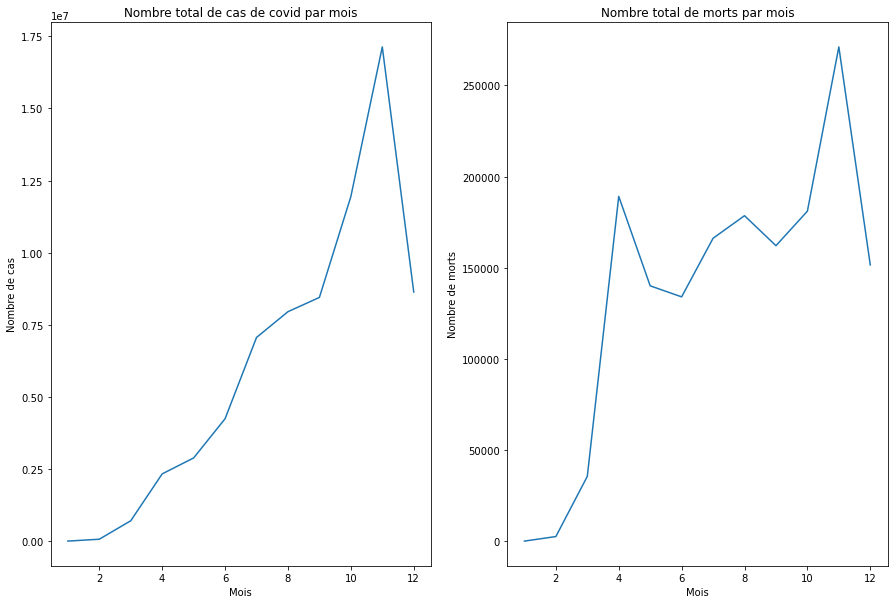

In [36]:
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

df_by_month['cases'].plot(kind='line',ax=ax1)
ax1.set_title("Nombre total de cas de covid par mois")
ax1.set_xlabel("Mois")
ax1.set_ylabel("Nombre de cas")
df_by_month['deaths'].plot(kind='line',ax=ax2)
ax2.set_title("Nombre total de morts par mois")
ax2.set_xlabel("Mois")
ax2.set_ylabel("Nombre de morts")